In [14]:
import pandas as pd

y_train = pd.read_csv("/mnt/c/Users/zer0nu11/Documents/workspace/projects/MatModSchool/target_test_small.csv")
X_train = pd.read_csv("/mnt/c/Users/zer0nu11/Documents/workspace/projects/MatModSchool/data_test_small.csv")

X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39943 entries, 0 to 39942
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   datetime      39943 non-null  object 
 1   telemetry_0   39942 non-null  float64
 2   telemetry_1   39942 non-null  float64
 3   telemetry_2   39942 non-null  float64
 4   telemetry_3   39942 non-null  float64
 5   telemetry_4   39942 non-null  float64
 6   telemetry_5   39942 non-null  float64
 7   telemetry_6   39942 non-null  float64
 8   telemetry_7   39942 non-null  float64
 9   telemetry_8   39942 non-null  float64
 10  telemetry_9   39942 non-null  float64
 11  telemetry_10  39942 non-null  float64
 12  telemetry_11  39942 non-null  float64
 13  telemetry_12  318 non-null    float64
 14  telemetry_13  318 non-null    float64
 15  telemetry_14  318 non-null    float64
 16  telemetry_15  318 non-null    float64
dtypes: float64(16), object(1)
memory usage: 5.2+ MB


In [15]:
X_train = X_train.rename(columns={'telemetry_0': 'temp4', 
                        'telemetry_1': 'consumption',
                        'telemetry_2': 'temp1', 
                        'telemetry_3': 'ampere_add',
                        'telemetry_4': 'press_add', 
                        'telemetry_5': 'temp3',
                        'telemetry_6': 'speed', 
                        'telemetry_7': 'press1',
                        'telemetry_8': 'press2', 
                        'telemetry_9': 'temp2',
                        'telemetry_10': 'temp5', 
                        'telemetry_11': 'temp6',
                        'telemetry_12': 'item1', 
                        'telemetry_13': 'item2',
                        'telemetry_14': 'item3', 
                        'telemetry_15': 'item4',})

y_train = y_train.rename(columns={'Дата': 'datetime'})

In [16]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39943 entries, 0 to 39942
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   datetime     39943 non-null  object 
 1   temp4        39942 non-null  float64
 2   consumption  39942 non-null  float64
 3   temp1        39942 non-null  float64
 4   ampere_add   39942 non-null  float64
 5   press_add    39942 non-null  float64
 6   temp3        39942 non-null  float64
 7   speed        39942 non-null  float64
 8   press1       39942 non-null  float64
 9   press2       39942 non-null  float64
 10  temp2        39942 non-null  float64
 11  temp5        39942 non-null  float64
 12  temp6        39942 non-null  float64
 13  item1        318 non-null    float64
 14  item2        318 non-null    float64
 15  item3        318 non-null    float64
 16  item4        318 non-null    float64
dtypes: float64(16), object(1)
memory usage: 5.2+ MB


In [17]:
X_train['datetime'] = pd.to_datetime(X_train['datetime'])
y_train['datetime'] = pd.to_datetime(y_train['datetime'])

In [18]:
import numpy as np

X_train = X_train.drop(X_train[X_train['datetime'] < y_train['datetime'][0]].index)
X_train = X_train.drop(X_train[X_train["datetime"] > y_train['datetime'].iloc[-1]].index)
X_train.head()

X_train = X_train.fillna(X_train.iloc[:, X_train.columns.get_loc('datetime')+1:].mean())
X_train = X_train.drop(X_train[X_train.duplicated()].index)
y_train = y_train.drop(y_train[y_train.duplicated()].index)

X_train = X_train[X_train['datetime'].isin(y_train['datetime'])]

In [19]:
import seaborn as sns

X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

data = X_train.merge(y_train, on='datetime', how='inner')


<Axes: >

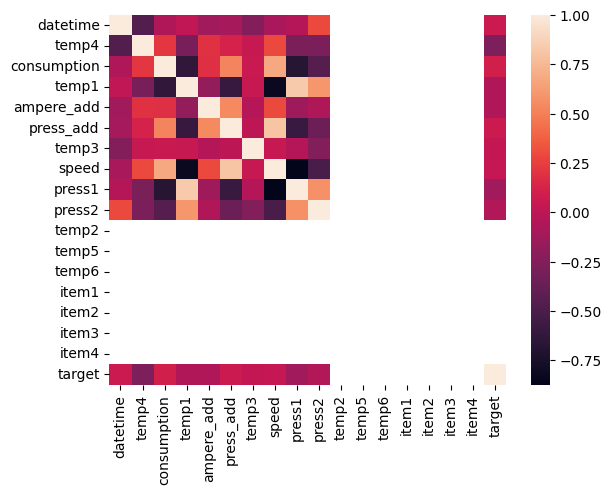

In [20]:
correlations = data.corr()
sns.heatmap(correlations)

<Axes: xlabel='target', ylabel='datetime'>

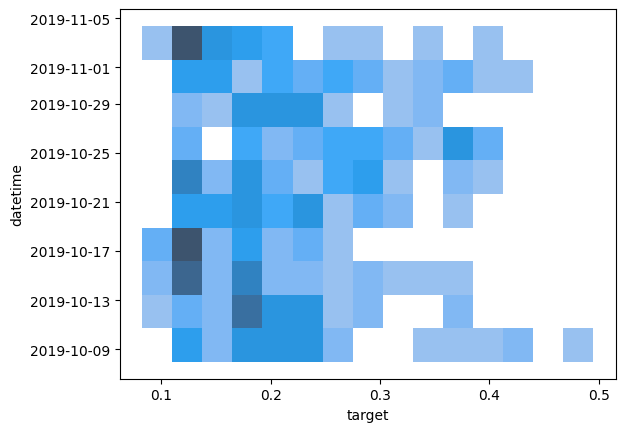

In [21]:
sns.histplot(x=y_train['target'], y=y_train['datetime'])

<Axes: xlabel='target', ylabel='datetime'>

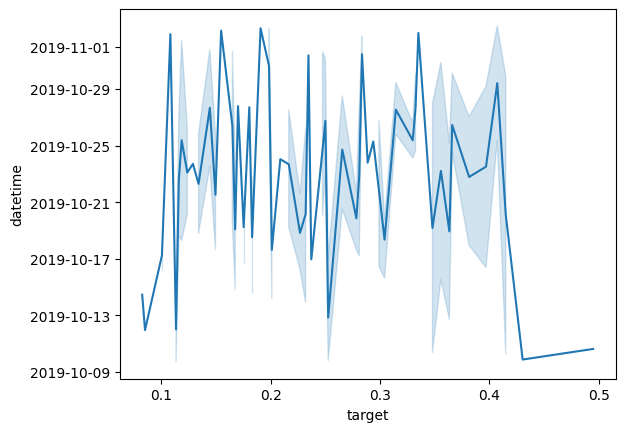

In [22]:
sns.lineplot(x=y_train['target'], y=y_train['datetime'])

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, 1:data.columns.get_loc('target')], data[['target']], test_size=0.2, random_state=10)

In [29]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

model.score(X_train, y_train)

model.predict(X_test)

array([[0.20351973],
       [0.22665607],
       [0.20651252],
       [0.21293689],
       [0.19143999],
       [0.18694153],
       [0.20259288],
       [0.06057051],
       [0.23755847],
       [0.20126862],
       [0.2320976 ],
       [0.26564185],
       [0.2721875 ],
       [0.21259179],
       [0.15833443],
       [0.21233282],
       [0.16320467],
       [0.25062935],
       [0.19245499],
       [0.24424126],
       [0.21178678],
       [0.23650134],
       [0.17939877],
       [0.23476478],
       [0.3153689 ],
       [0.20782274],
       [0.23824562],
       [0.17459153],
       [0.18501381],
       [0.18771725],
       [0.18881974],
       [0.25282878],
       [0.20318597],
       [0.20633563],
       [0.1975642 ],
       [0.22220085],
       [0.18774961],
       [0.19549439],
       [0.19444137],
       [0.28103438],
       [0.21476365],
       [0.222664  ],
       [0.21778632],
       [0.19226707],
       [0.18654833],
       [0.24577576],
       [0.19704157],
       [0.177

In [30]:
# from sklearn.model_selection import cross_val_score

# cv_scores = cross_val_score(model, X_train, y_train, cv=10, scoring="mean_absolute_error")
# cv_scores

In [31]:
model.score(X_train, y_train)

0.1434906636774439